<a href="https://colab.research.google.com/github/Was404/-lassify_images_of_clothing/blob/main/Classification_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация объектов на изображении
> *Используем tensorFlow и tf.keras для тренировки нашей модели*
## 1. Импорт данных

In [ ]:
!pip install matplotlib
!pip install numpy
!pip install tensorflow

In [6]:
import tensorflow as tf
# Вспомогательные библиотеки
import numpy as np
import matplotlib.pyplot as plt

#print(tf.__version__)

Импортируем и загружаем данные Fashion MNIST напрямую из TensorFlow:

In [7]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


 Загрузка набора данных возвращает четыре массива NumPy:

`train_images` и `train_labels` представляют собой обучающий набор — данные, которые модель использует для обучения.

Модель тестируется на **тестовом** наборе , `test_images` и `test_labels`

In [12]:
train_images.shape
test_images.shape
len(train_labels) # кол-во меток
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# 2. Исследование данных
Данные должны быть предварительно обработаны перед обучением сети.

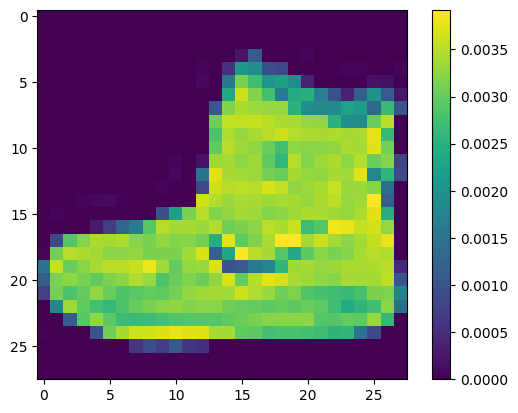

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


Значения пикселей изображений из тренировочного набора `train_images` попадают в диапазон от 0 до 255. Масштабируем эти значения в диапазоне от 0 до 1, прежде чем передавать их в модель нейронной сети. Обучающая выборка и проверочная выборка предварительно обрабатываются одинаково.
Выведем первые 25 изображений из обучающего набора и отобразим имя класса под каждым изображением.

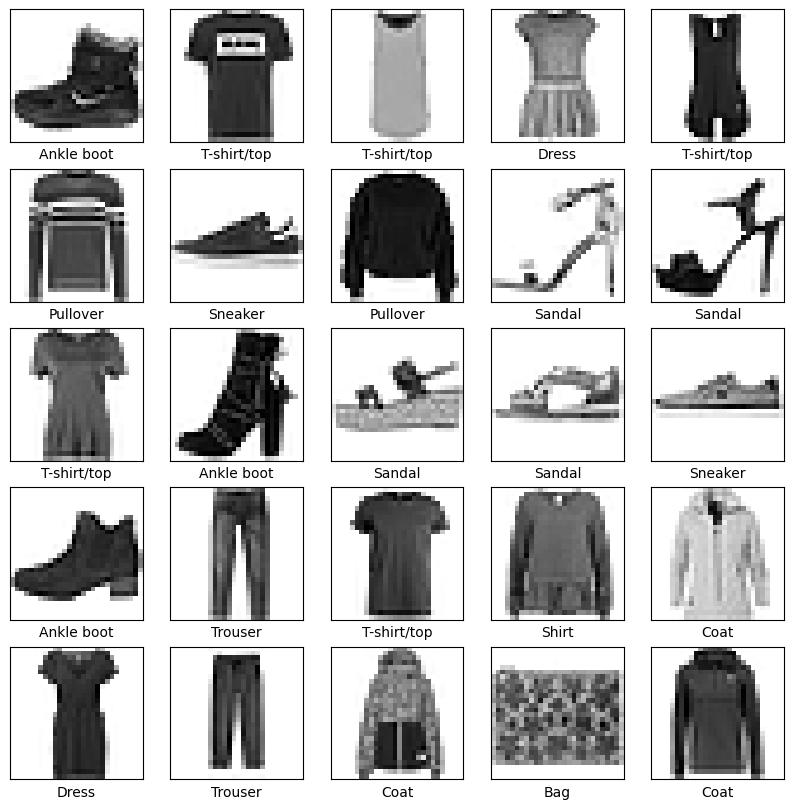

In [14]:
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()



# 3. Построение модели
 Для построения нейронной сети необходимо настроить слои модели, а затем скомпилировать модель.
### Настройка слоев

Основным строительным блоком нейронной сети является слой . Слои извлекают представления из введенных в них данных.

Большая часть глубокого обучения состоит из объединения простых слоев. Большинство слоев, таких как `tf.keras.layers.Dense` , имеют параметры, которые изучаются во время обучения.

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


 Первый слой в этой сети, `tf.keras.layers.Flatten` , преобразует формат изображений из двумерного массива (28 на 28 пикселей) в одномерный массив (28 * 28 = 784 пикселей). Думайте об этом слое как о разделении рядов пикселей на изображении и их выравнивании. Этот слой не имеет параметров для изучения; он только переформатирует данные.

После выравнивания пикселей сеть состоит из последовательности двух слоев
`tf.keras.layers.Dense` . Это плотно связанные или полностью связанные нейронные слои. Первый Dense слой имеет 128 узлов (или нейронов). Второй (и последний) слой возвращает массив логитов длиной 10. Каждый узел содержит оценку, указывающую, что текущее изображение принадлежит к одному из 10 классов.

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#Компиляция модели

# 4. Обучение модели
 Для обучения модели нейронной сети необходимо выполнить следующие шаги:

  * Подаём обучающие данные к модели(обучающие данные находятся в `train_images` и `train_labels`).
  * Модель учится связывать изображения и метки.
  * Запрашиваем у модели сделать прогноз относительно `test_images`
  * Проверяем чтобы прогнозы соответствовали меткам из массива `test_labels`

In [17]:
model.fit(train_images, train_labels, epochs=10) # Кормим модель обучающими данными

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3026 - accuracy: 0.1016
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3013 - accuracy: 0.1133
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2953 - accuracy: 0.1419
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2801 - accuracy: 0.1797
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2542 - accuracy: 0.1926
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.2204 - accuracy: 0.2101
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.1812 - accuracy: 0.2022
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1395 - accuracy: 0.2148
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.0967 - accuracy: 0.2092
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.054

# 5. Оценка точности прогноза
Точность на тестовом наборе данных может быть немного меньше, чем точность на обучающем наборе данных. Этот разрыв между точностью обучения и точностью теста представляет собой переоснащение . Переоснащение происходит, когда модель машинного обучения работает хуже с новыми, ранее невиданными входными данными, чем с обучающими данными. Переобученная модель «запоминает» шум и детали в обучающем наборе данных до такой степени, что это негативно влияет на производительность модели на новых данных.

In [18]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 1s - loss: 2.0344 - accuracy: 0.2099 - 668ms/epoch - 2ms/step

Test accuracy: 0.20990000665187836


# 6. Делаем предсказание
Обученную модель можно использовать для прогнозирования некоторых изображений. Прикрепляем слой softmax для преобразования линейных выходных данных модели — логитов — в вероятности, которые должны быть легче интерпретировать.

In [19]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)


313/313 [==============================] - 1s 3ms/step


In [20]:
predictions[0]
# для теста посмотрим на первый прогноз

array([0.04113349, 0.04917724, 0.05826968, 0.04724123, 0.05068094,
       0.18138656, 0.05989903, 0.18827833, 0.14231037, 0.18162304],
      dtype=float32)

 Прогноз представляет собой массив из 10 чисел. Они отражают «уверенность» модели в том, что изображение соответствует каждому из 10 различных предметов одежды.

In [21]:
test_labels[0]

9

Полный набор из 10 предсказаний класса.

In [22]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


# 7. Проверяем прогнозы
Смотрим на прогнозы и массив прогнозов. Метки правильных прогнозов выделены синим цветом, а метки неправильных прогнозов — красным. Число указывает процент (из 100) предсказанной метки.

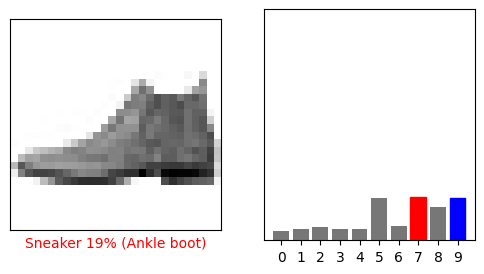

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


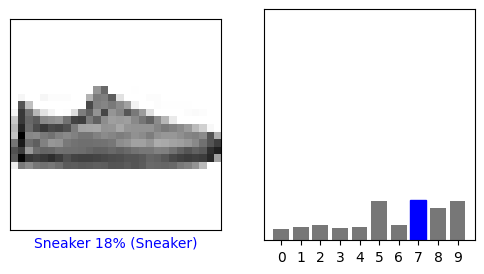

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


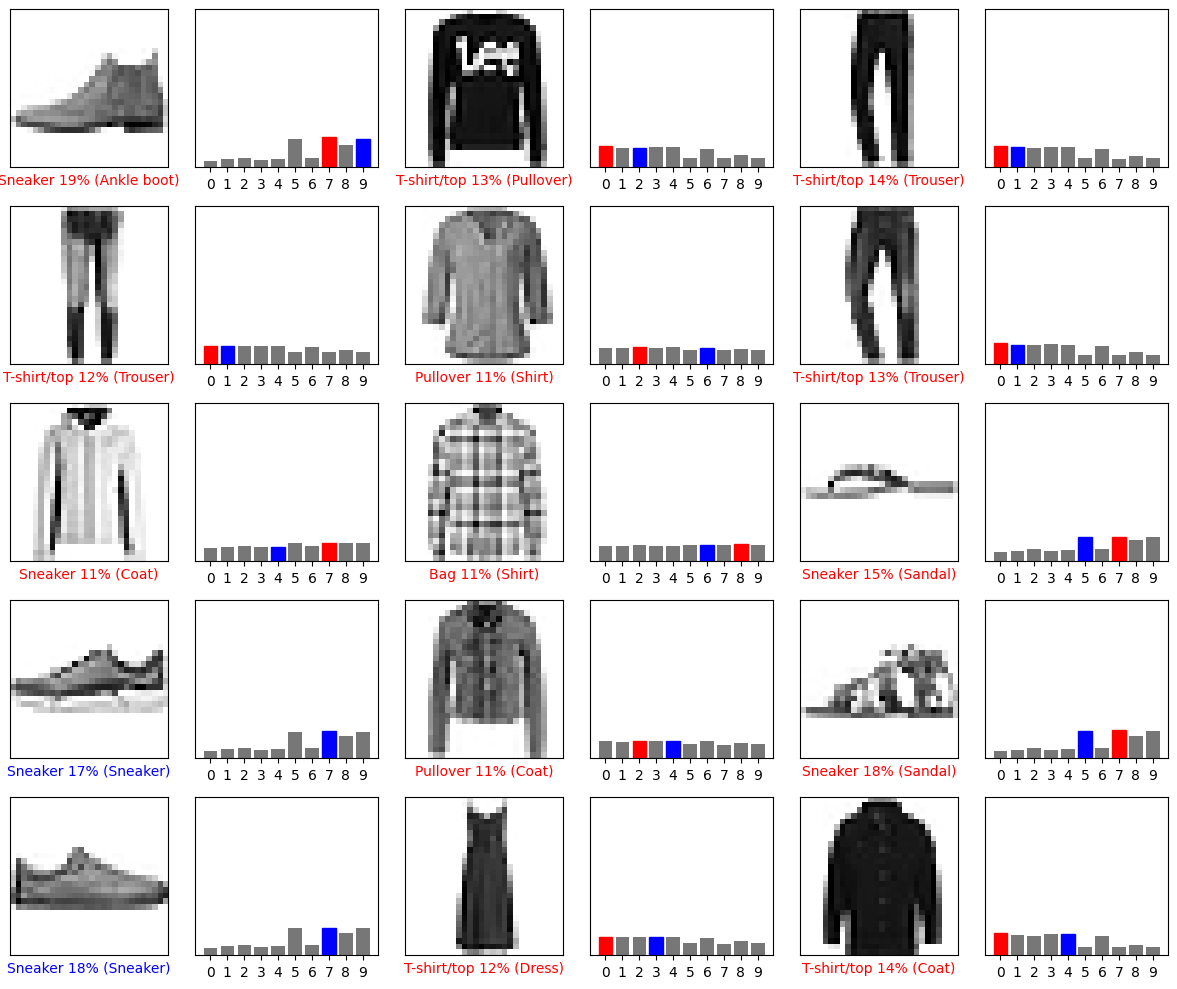

In [25]:
# Цветовые правильные прогнозы выделены синим цветом, а неправильные — красным
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


# 8. Используем готовую модель
Чтобы сделать прогноз для одного изображения

In [26]:
img = test_images[1]

print(img.shape)


(28, 28)
